In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Abhi@123",
                            database = "ecommerce")

cur = db.cursor()
print("connected")

connected


# find the average number of product per order group by customer city

In [9]:
query = """
WITH count_per_order AS (
    SELECT 
        orders.order_id,
        orders.customer_id, 
        COUNT(order_items.order_id) AS oc
    FROM orders 
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
) 
SELECT 
    customers.customer_city,
    ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers 
JOIN count_per_order
    ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city order by average_orders desc;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer_city", "average_orders"])
df.head(10)


,customer_city,average_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product category.

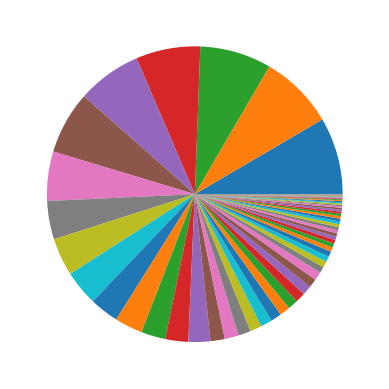

In [14]:

query = """
SELECT 
    UPPER(products.product_category) AS category,
    ROUND((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    category
ORDER BY 
    sales_percentage DESC;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "percentage_distribution"])
plt.pie(df["percentage_distribution"])
plt.show()


# Identify the correlation between product price and the number of times a product has been purchased.

In [29]:
query = """ 
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["category","order_count","price"])
arr1 = df["order_count"]
arr2 = df["price"]

np.corrcoef([arr1,arr2])


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [13]:
query = """
select order_items.seller_id, 
sum(payments.payment_value) 
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id;
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["seller_id", "revenue"])
df

,seller_id,revenue
0,dd7ddc04e1b6c2c614352b383efe2d36,16061.360107
1,cc419e0650a3c5ba77189a1882b7556a,141309.580055
2,1f50f920176fa81dab994f9023523100,290253.420128
3,822bad9bc42b51213ba522fe87b7ab5d,5774.740028
4,cea729054f157f5870bdd321a958d994,3458.130013
...,...,...
3090,3e51f9cbe317bc3a88f2c76583811ee4,84.779999
3091,499185655c29ecfdbfe776ef7cf875b5,106.330002
3092,e908c0f3646e8b60375734a350d95d71,3009.530029
3093,497709c2976a8fa308730a2dec5b0726,188.080002


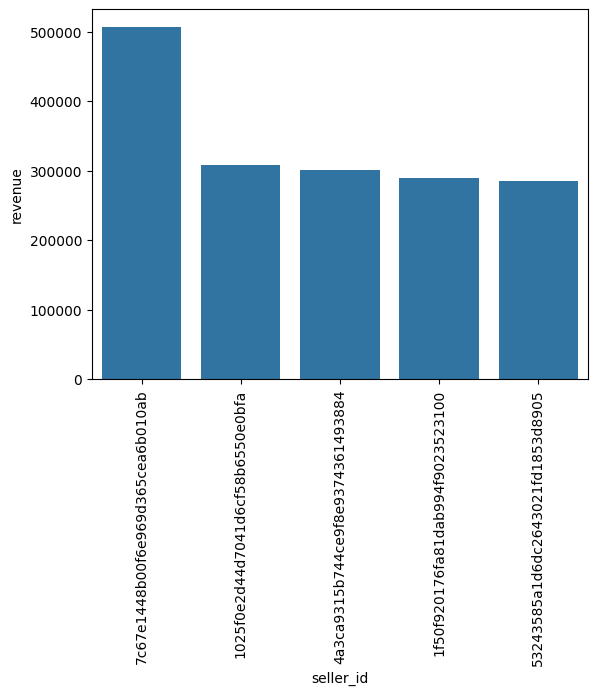

In [19]:
query = """select *,dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments 
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df )
plt.xticks(rotation = 90)
plt.show()

